# Convolutional Autoencoder

Compressing and Denoising the MNIST dataset with an autoencoder using convolutional layers

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


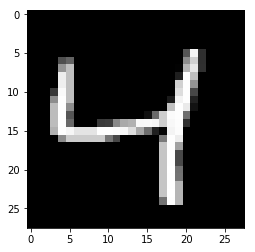

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

## Network

In [4]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

# Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)

maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')

conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)

maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')

conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)

encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')


# Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))

conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)

upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))

conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)

upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))

conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
sess = tf.Session()

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7175
Epoch: 1/20... Training loss: 0.7037
Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6861
Epoch: 1/20... Training loss: 0.6791
Epoch: 1/20... Training loss: 0.6711
Epoch: 1/20... Training loss: 0.6677
Epoch: 1/20... Training loss: 0.6544
Epoch: 1/20... Training loss: 0.6411
Epoch: 1/20... Training loss: 0.6313
Epoch: 1/20... Training loss: 0.6163
Epoch: 1/20... Training loss: 0.5944
Epoch: 1/20... Training loss: 0.5790
Epoch: 1/20... Training loss: 0.5581
Epoch: 1/20... Training loss: 0.5455
Epoch: 1/20... Training loss: 0.5242
Epoch: 1/20... Training loss: 0.5313
Epoch: 1/20... Training loss: 0.5310
Epoch: 1/20... Training loss: 0.5707
Epoch: 1/20... Training loss: 0.5340
Epoch: 1/20... Training loss: 0.5298
Epoch: 1/20... Training loss: 0.5168
Epoch: 1/20... Training loss: 0.5185
Epoch: 1/20... Training loss: 0.5309
Epoch: 1/20... Training loss: 0.5067
Epoch: 1/20... Training loss: 0.5098
Epoch: 1/20... Training loss: 0.5119
E

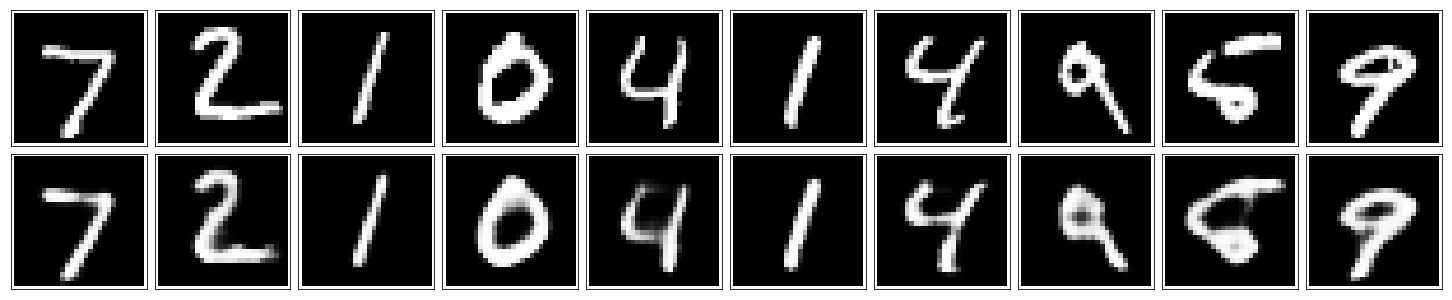

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Denoising

In [9]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 32, (3,3), padding='same', activation=tf.nn.relu)

maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')

conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)

maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')

conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)

encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')


### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))

conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)

upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))

conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)

upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))

conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [10]:
sess = tf.Session()

In [11]:
epochs = 100
batch_size = 200
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)

        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to input
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip input to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/100... Training loss: 0.7070
Epoch: 1/100... Training loss: 0.6916
Epoch: 1/100... Training loss: 0.6808
Epoch: 1/100... Training loss: 0.6652
Epoch: 1/100... Training loss: 0.6448
Epoch: 1/100... Training loss: 0.6135
Epoch: 1/100... Training loss: 0.5756
Epoch: 1/100... Training loss: 0.5373
Epoch: 1/100... Training loss: 0.4969
Epoch: 1/100... Training loss: 0.4903
Epoch: 1/100... Training loss: 0.5216
Epoch: 1/100... Training loss: 0.5246
Epoch: 1/100... Training loss: 0.5069
Epoch: 1/100... Training loss: 0.4915
Epoch: 1/100... Training loss: 0.4751
Epoch: 1/100... Training loss: 0.4709
Epoch: 1/100... Training loss: 0.4757
Epoch: 1/100... Training loss: 0.4644
Epoch: 1/100... Training loss: 0.4638
Epoch: 1/100... Training loss: 0.4564
Epoch: 1/100... Training loss: 0.4444
Epoch: 1/100... Training loss: 0.4443
Epoch: 1/100... Training loss: 0.4360
Epoch: 1/100... Training loss: 0.4358
Epoch: 1/100... Training loss: 0.4107
Epoch: 1/100... Training loss: 0.4101
Epoch: 1/100

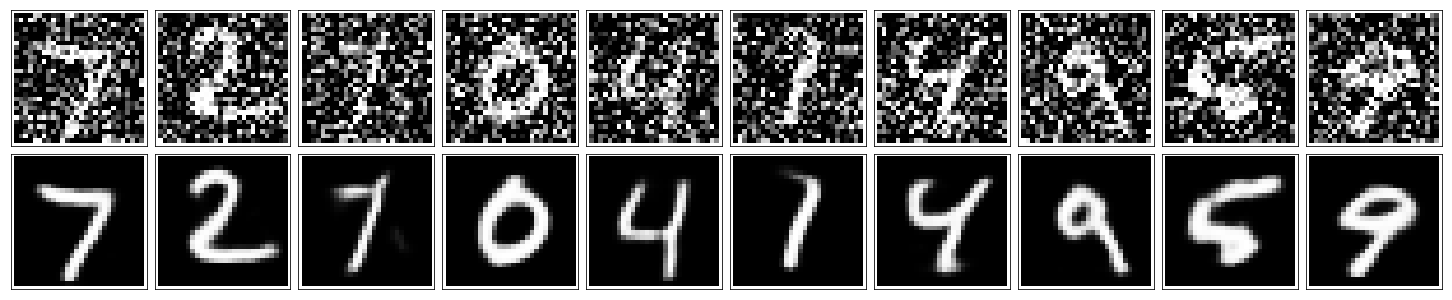

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)